# Modelos predictivos: Rasgos de la personalidad

La personalidad es un conjunto de varias características que configran la manera de ser de una persona, algunas personas señalan que cada persona tiene una personalidad única e irrepetible. Sin embargo, existen al menos en el campo de la inteligencia artificial; algunos modelos que proponen describir algunas de estás propiedades de las personas. La herramienta utilizada en esta ocasión es una API de la empresa norteamerica de tecnología, IBM(TM). Esta herramienta que proporciona un buen modelo de entrenamiento alojado en los servidores de la misma empresa, nos permite hacer llamadas por medios de unas credenciales que se pueden obtener al crear una cuenta en IBM Cloud: https://cloud.ibm.com/.

Luego de crear la cuenta, se consume el servicio conocido como Personality Insights, que es uno de varias tecnologías que se pueden tener a disposición y con la cuenta gratuita te dan alrededor de 1000 llamadas al mes para consultas de la o de las API's que se estén utlizando: https://cloud.ibm.com/catalog/services/personality-insights.

Los documentos de los sitios oficiales de la empresa no son muy extensos respecto a los detalles técnicos de la implementación, sin embargo la documentación de la API no esta mal, que inclusive menciona algunos datos sobre como se hacen los modelos de predicción de la personalidad desde el punto de vista psicológico como publicitario, por que a fin de cuentas es una herrmienta como muchas otra utlizada para diversos fines, sin embargo en esta ocasión se plane utlizarla como un medio para detectar rasgos de personalidad en personas con problemas sobre todo de depresión.

Un link más dónde se pued encontrar la documentación de la API: https://cloud.ibm.com/catalog/services/personality-insights.

![5.png](5.png)
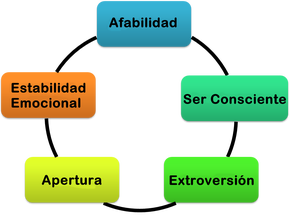

El primer paso fue verificar que se podía consumir la API con Python, lo cual resulto bien, pero se tuvieron que realizar varios pasos previos desde generar la cuenta hasta obtener las credenciales para poder generar las llamadas con una autenticación correcta.

In [2]:
#Import personality Insights SDK
from watson_developer_cloud import PersonalityInsightsV3

Cuando se consume la API, encuentras que el método que te genera el perfil de lo que se está ingresando (en este caso un texto), va a retorno un archivo .json en el cual con esa estructura de árbol jerárquico se van subdividiendo los campos de interés que se pueden obtener de una persona, por ello se incluye la biblioteca para utlizar algunos métodos necesarios en está implmentación. Por otro parte se proponía que como los texto sería interesante que ingresarán en idioma inglés que es como el modelo funciona mejor; podemos traducir con una API de google, para saber en nuestro idioma que es lo que estamos ingresando.

In [3]:
#import json
import json
#import googletraslate
from googletrans import Translator

Cuando ya se cosume el servicio en la cuenta de IBM Cloud, te genera unas credenciales al gestionar la cuenta que se ven masmenos así:

![Captura_IBM.PNG](Captura_IBM.PNG)
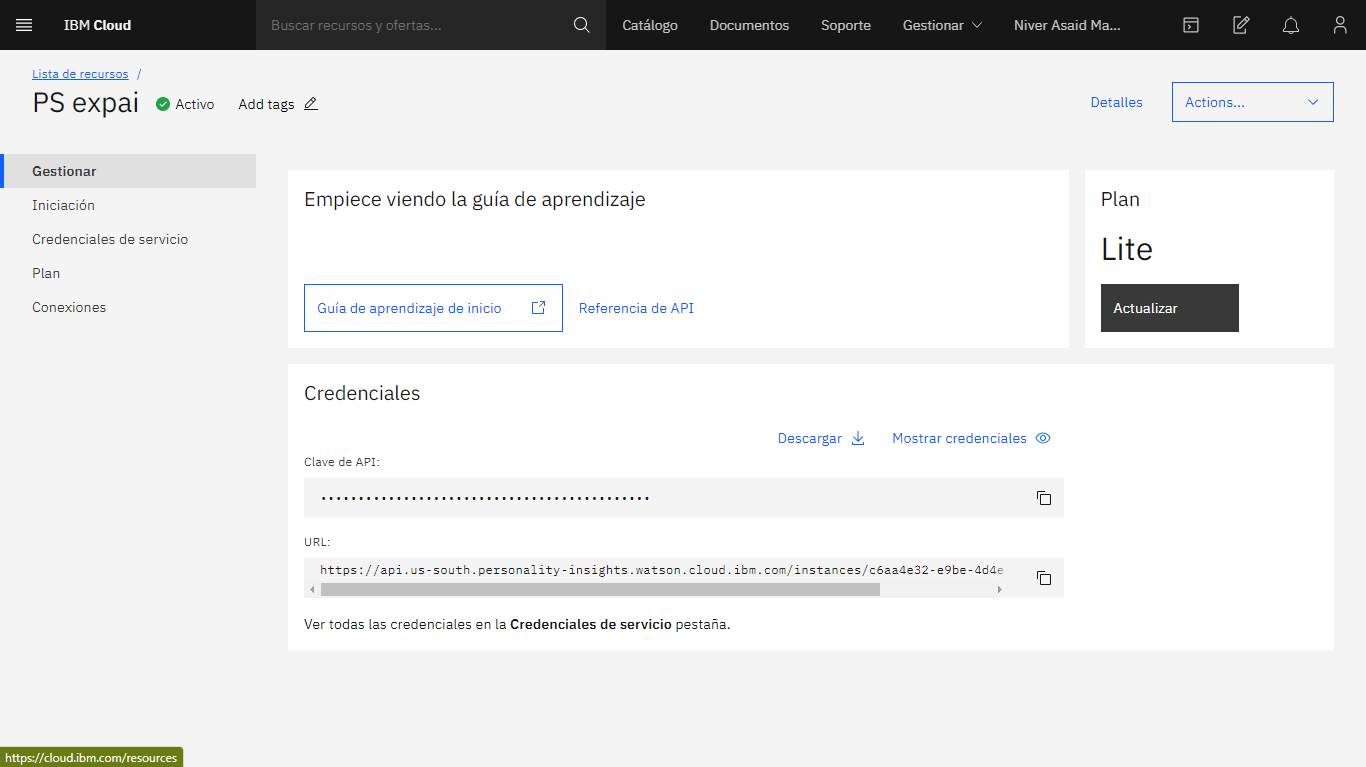

Y esas son las credenciales que te pide el servicio para instanciarlo. Esto es lo más tedioso de consumir la API.

In [4]:
url='https://api.us-south.personality-insights.watson.cloud.ibm.com/instances/c6aa4e32-e9be-4d4e-8ce3-8b8abf5aa155'

In [5]:
apikey='-P2pUTGEF30hXdiS4iUQH05400USV7imPKkZa9aN82Zq'

In [6]:
service = PersonalityInsightsV3(url=url, iam_apikey=apikey, version='2020-05-30')

C:\Users\niver\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: watson-developer-cloud moved to ibm-watson. To get updates, use the new package.
  """Entry point for launching an IPython kernel.


# Implementación: ¿Qué nos dicen los post de una persona?

    "Las palabras están perdidas y revueltas, a veces duras y a veces lentas". 

Estuve revisando algunas propuestas para ver como conseguía información y recursos que me proporcionaran un mejor método para utlizar el modelo, pues en sí lo más interesante de esto es a mi parecer entender como se puede aplicar un campo de la inteligencia artificial para interpretar cosas de nuestra vida cotidiana. Watson, es un agente que se dice una de las inteligencia artificiales más desarrolladas de nuestros tiempos y con ello observamos que la precisión del modelo podía ser puesta a prueba respecto a texto de pesonas con depresión que fuí encontrando en foros, pero principalmente el sitio reddit (cabe señalar que a pesar de tomar información de otras personas se ha dejado lejos de la vista pública). Se deja el enlace a algunosos foros que son públicos:

https://www.reddit.com/r/ForeverAlone/comments/gt830p/quarantine_period_about_to_end_in_from_where_im/
https://www.reddit.com/r/ForeverAlone/comments/gth67q/every_time_a_new_school_year_starts_i_get_hopeful/

El método que se utilizó para obtener los post fue algo artesanal en esata ocasión, aunque me hubiera encantado hacer un poco de web scraping para obtener la información.

In [7]:
files = ['prueba.txt','prueba2.txt','prueba3.txt']

#Leer y convertir a cadena el archivo.
file =  open(files[2],'r')
text = file.read()

#### Como el archivo que se ingresa está en inglés, se hace una traducción utilzando la API de google como ya se había mencionado, sól para ilustrar lo que estamos ingresando.

In [9]:
#Traducir el archivo
translator = Translator()
translated = translator.translate(text, src='en', dest='es')
print(translated.text)

Cada vez que se inicia un nuevo ciclo escolar consigo la esperanza de entonces inmediatamente se deprimen
Respiradero
El subir en mi último año, me di cuenta de la cantidad de una causa perdida realmente soy. Cada verano me imagino todas las maneras en que puedo hacer nuevos amigos y tal vez encontrar una chica que me gusta demasiado sólo para la escuela para comenzar y después de un mes de que pierda toda esperanza. Me Cana € ™ t encontrar amigos que realmente quieren hablar conmigo, la mayoría de las personas terminan evitando mí desde IA € ™ m no muy interesante y todas las chicas IA € ™ he tratado de hablar a actuar como theyâ € ™ re sólo se escucha hacer caso de mí para el resto del año. Tengo un solo amigo y sólo podemos hablar en línea desde heâ € ™ s declaró distancia. Nunca puedo salir de la casa para pasar el rato o ver películas a menos que € ™ s que con mis padres. Yo dona € ™ t siento como IA € ™ m raro en la escuela o cualquier cosa que supongo IA € ™ m simplemente no lo 

#### Cómo se pensó hacia la aplicación (sitio web) que se desarrolló, también se podía ingresar el texto desde una caja de texto para alguien que sólo quisiera copiar su texto.

In [10]:
"""I live in a state where things are still very much on lockdown because of COVID, despite the rates being down to almost nothing.

The lockdown keeps getting extended while data is showing a sharp increase in suicides. The goal of the lockdown was to not overfill hospitals... they’re almost completely devoid of COVID patients now. Yet here we are, extending the lockdown.

It’s just one more indicator of the fact that this country doesn’t take mental health seriously and it never has. If you are struggling, good fucking luck to you. Here’s a phone number. Feel better, kay?

I don’t care to argue the merits of the lockdown, I know to an extent it was necessary. But we are far beyond that now and many people, like me and possibly like you, are struggling with suicidal thoughts and trying not to make that permanent decision due to the fact that our coping mechanisms have been taken away for months now."""

'I live in a state where things are still very much on lockdown because of COVID, despite the rates being down to almost nothing.\n\nThe lockdown keeps getting extended while data is showing a sharp increase in suicides. The goal of the lockdown was to not overfill hospitals... they’re almost completely devoid of COVID patients now. Yet here we are, extending the lockdown.\n\nIt’s just one more indicator of the fact that this country doesn’t take mental health seriously and it never has. If you are struggling, good fucking luck to you. Here’s a phone number. Feel better, kay?\n\nI don’t care to argue the merits of the lockdown, I know to an extent it was necessary. But we are far beyond that now and many people, like me and possibly like you, are struggling with suicidal thoughts and trying not to make that permanent decision due to the fact that our coping mechanisms have been taken away for months now.'

# Ya leímos el texto ¿Ahora qué?

Bien, la instancia que hicimos del servicio de _Personalities Insights_ , nos permite que ahora llamemos por medio de su método _profile_ , un retorno que vamos a guradar en una variable y que este es una salida muy característica, pues tiene la estrutura de un diccionario y esto hace que se muy sencillo llevarko hacia una instancia de un archivo tipo .json que para esto fines nos resulta bastante útil, pues con ek es como ir accediendo por un árbol buscando información.

In [11]:
profile = service.profile(text, content_type = 'text/plain').get_result()

Y cómo en la varible profile ya encontramos alojado un diccionario. Podemos hacer todas las operaciones propias de este tipo de estructura en Python, a continuación se ilustran algunas:

In [13]:
#profile['warnings']
#profile['processed_language']
#profile['processed_language']
profile['personality']

[{'trait_id': 'big5_openness',
  'name': 'Openness',
  'category': 'personality',
  'percentile': 0.12815913523744238,
  'significant': True,
  'children': [{'trait_id': 'facet_adventurousness',
    'name': 'Adventurousness',
    'category': 'personality',
    'percentile': 0.02053905567538128,
    'significant': True},
   {'trait_id': 'facet_artistic_interests',
    'name': 'Artistic interests',
    'category': 'personality',
    'percentile': 0.39312075578453515,
    'significant': True},
   {'trait_id': 'facet_emotionality',
    'name': 'Emotionality',
    'category': 'personality',
    'percentile': 0.7205952651030733,
    'significant': True},
   {'trait_id': 'facet_imagination',
    'name': 'Imagination',
    'category': 'personality',
    'percentile': 0.5615795349162922,
    'significant': True},
   {'trait_id': 'facet_intellect',
    'name': 'Intellect',
    'category': 'personality',
    'percentile': 0.38808623341446097,
    'significant': True},
   {'trait_id': 'facet_liber

In [15]:
print(json.dumps(profile, indent=2)) # Lo llevamos hacia un .json y le damos identación

{
  "word_count": 211,
  "word_count_message": "There were 211 words in the input. We need a minimum of 600, preferably 1,200 or more, to compute statistically significant estimates",
  "processed_language": "en",
  "personality": [
    {
      "trait_id": "big5_openness",
      "name": "Openness",
      "category": "personality",
      "percentile": 0.12815913523744238,
      "significant": true,
      "children": [
        {
          "trait_id": "facet_adventurousness",
          "name": "Adventurousness",
          "category": "personality",
          "percentile": 0.02053905567538128,
          "significant": true
        },
        {
          "trait_id": "facet_artistic_interests",
          "name": "Artistic interests",
          "category": "personality",
          "percentile": 0.39312075578453515,
          "significant": true
        },
        {
          "trait_id": "facet_emotionality",
          "name": "Emotionality",
          "category": "personality",
          "per

In [16]:
profile.keys() # Podemos mostrar todas sus llaves

dict_keys(['word_count', 'word_count_message', 'processed_language', 'personality', 'needs', 'values', 'warnings'])

In [17]:
profile #Mostralo todo por completo

{'word_count': 211,
 'word_count_message': 'There were 211 words in the input. We need a minimum of 600, preferably 1,200 or more, to compute statistically significant estimates',
 'processed_language': 'en',
 'personality': [{'trait_id': 'big5_openness',
   'name': 'Openness',
   'category': 'personality',
   'percentile': 0.12815913523744238,
   'significant': True,
   'children': [{'trait_id': 'facet_adventurousness',
     'name': 'Adventurousness',
     'category': 'personality',
     'percentile': 0.02053905567538128,
     'significant': True},
    {'trait_id': 'facet_artistic_interests',
     'name': 'Artistic interests',
     'category': 'personality',
     'percentile': 0.39312075578453515,
     'significant': True},
    {'trait_id': 'facet_emotionality',
     'name': 'Emotionality',
     'category': 'personality',
     'percentile': 0.7205952651030733,
     'significant': True},
    {'trait_id': 'facet_imagination',
     'name': 'Imagination',
     'category': 'personality',
 

# Visualización del perfil

Ahora que ya tenemos en un diccionario la información que nos interesa, podemos llevarla a teerminos de otra estructura de datos que nos deja apreciar alguas caracteríticas más estructuradas de un perfil asociado al porcentaje que se encuentra presente de ciertos rasgos de personalidad, valores y necesidades presentes en los textos.

In [18]:
#import pandas
import pandas as pd

#import matplotlib
from matplotlib import pyplot as plt

#import seaborn
import seaborn as sns

Ahora generamos un diccionario de sólo las partes que nos interesa mostrar, tal que es el porcentaje de presencia de los rasgos y su correspondiente denominación:

In [22]:
#Generamos los diccionarios que nos interesan

result_p = {need['name']:need['percentile'] for need in profile['personality']}
result_n = {need['name']:need['percentile'] for need in profile['needs']}
result_v = {need['name']:need['percentile'] for need in profile['values']}

In [26]:
#Generamo los dataframes para poderlos levar a gráficas

df_p = pd.DataFrame.from_dict(result_p, orient='index')
df_n = pd.DataFrame.from_dict(result_n, orient='index')
df_v = pd.DataFrame.from_dict(result_v, orient='index')

In [27]:
#Reiniciamos indices

df_p.reset_index(inplace=True); df_n.reset_index(inplace=True); df_v.reset_index(inplace=True)

In [29]:
#Renombramos las columnas

df_p.columns=['personality','percentile']; df_n.columns=['needs','percentile']; df_v.columns=['values','percentile']

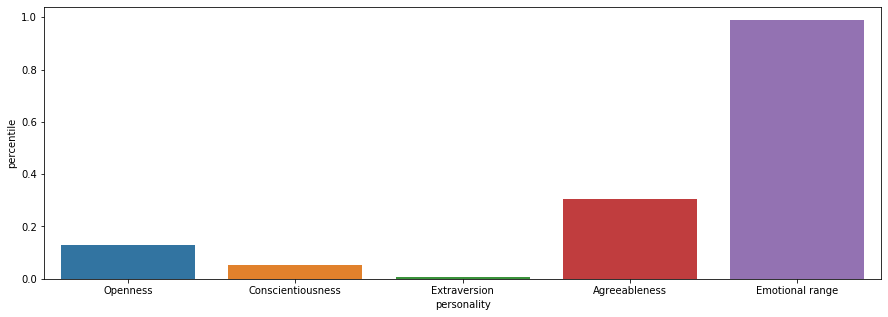

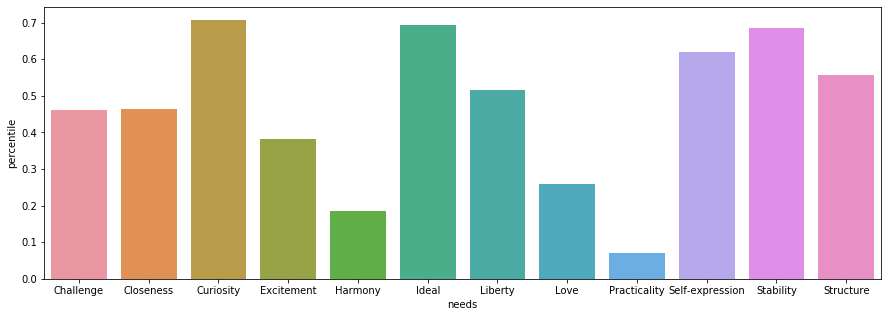

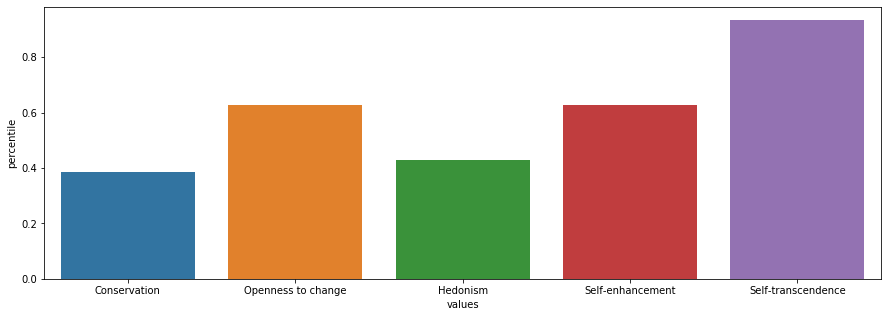

In [44]:
#Mostramos los resultados

#Rasgos de personalidad
plt.figure(figsize=[15,5])
sns.barplot(y='percentile', x='personality', data=df_p)
plt.show()

#Neceidades básicas
plt.figure(figsize=[15,5])
sns.barplot(y='percentile', x='needs', data=df_n)
plt.show()

#Valores
plt.figure(figsize=[15,5])
sns.barplot(y='percentile', x='values', data=df_v)
plt.show()